# `pandas plot` Method and Scraping City Population and Planetary Data

* `pandas plot` Method
* Scraping city population data
* Worksheet

## `plot`

In [1]:
import pandas as pd, matplotlib.pyplot as plt

In [2]:
bear = pd.Series(range(6))
bear

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

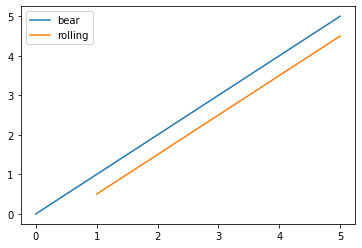

In [11]:
bear.plot(label='bear')
bear.rolling(2, center=True).mean().plot(label='rolling')
plt.legend()

<font color=red>***That's pretty screwy, which is why we will make our own running mean.***

In [13]:
import numpy as np

In [14]:
index = ['one', 'two', 'three', 'four']
columns = ['A', 'B', 'C', 'D']
data = np.arange(16).reshape(4, 4)
df = pd.DataFrame(data, index, columns)
df

,A,B,C,D
one,0,1,2,3
two,4,5,6,7
three,8,9,10,11
four,12,13,14,15


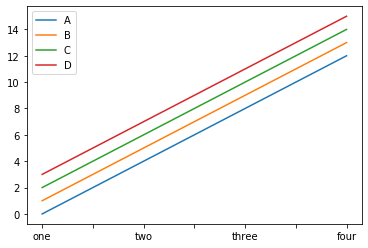

In [15]:
df.plot()

<font color=red>***Ugh, that's not what I wanted. For some reason, I assumed it would plot each row, but it plotted each column.***

In [22]:
df = df.T
df

,one,two,three,four
A,0,4,8,12
B,1,5,9,13
C,2,6,10,14
D,3,7,11,15


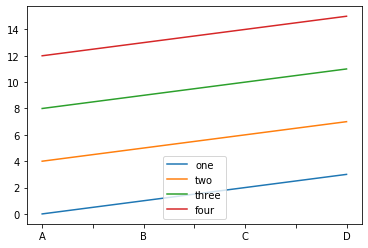

In [23]:
df.plot()

<font color=red>***That's more like it.***

(0, 3)

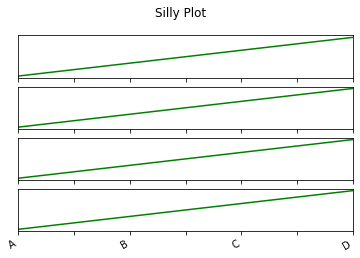

In [31]:
p = df.plot(subplots=True, legend=None, color='g',
            yticks=[], title='Silly Plot')
plt.xlim(0, 3)

In [32]:
p

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000282C2EAF388>,
      dtype=object)

Text(0, 0.5, 'hmm')

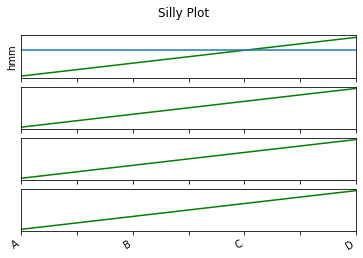

In [35]:
p = df.plot(subplots=True, legend=None, color='g',
            yticks=[], title='Silly Plot')
plt.xlim(0, 3)
flatline = pd.Series([2, 2, 2, 2], columns)
flatline.plot(ax=p[0])
p[0].set_ylabel('hmm')

<font color=red>***Bingo, added a curve to a subplot and a y-label.***

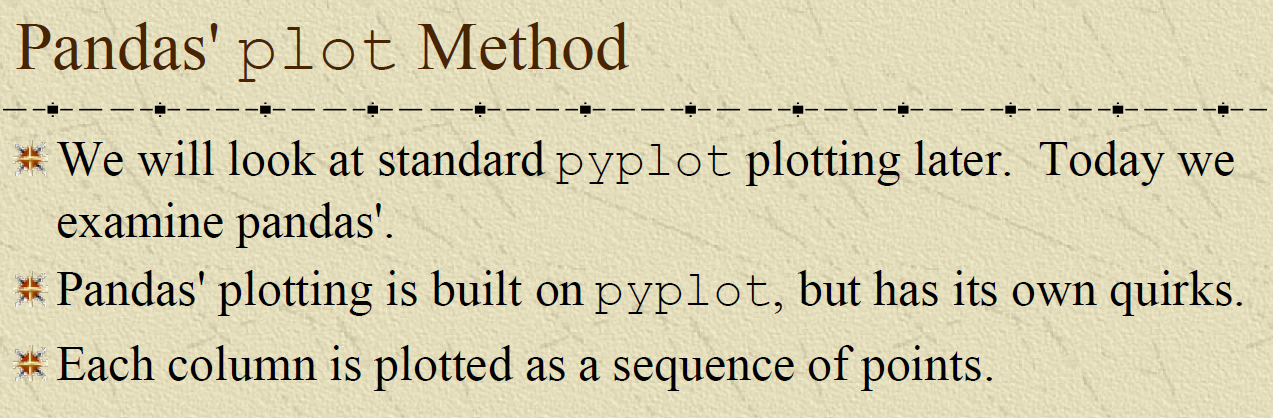

## Scraping and Parsing

<font color=red>***Recall:***

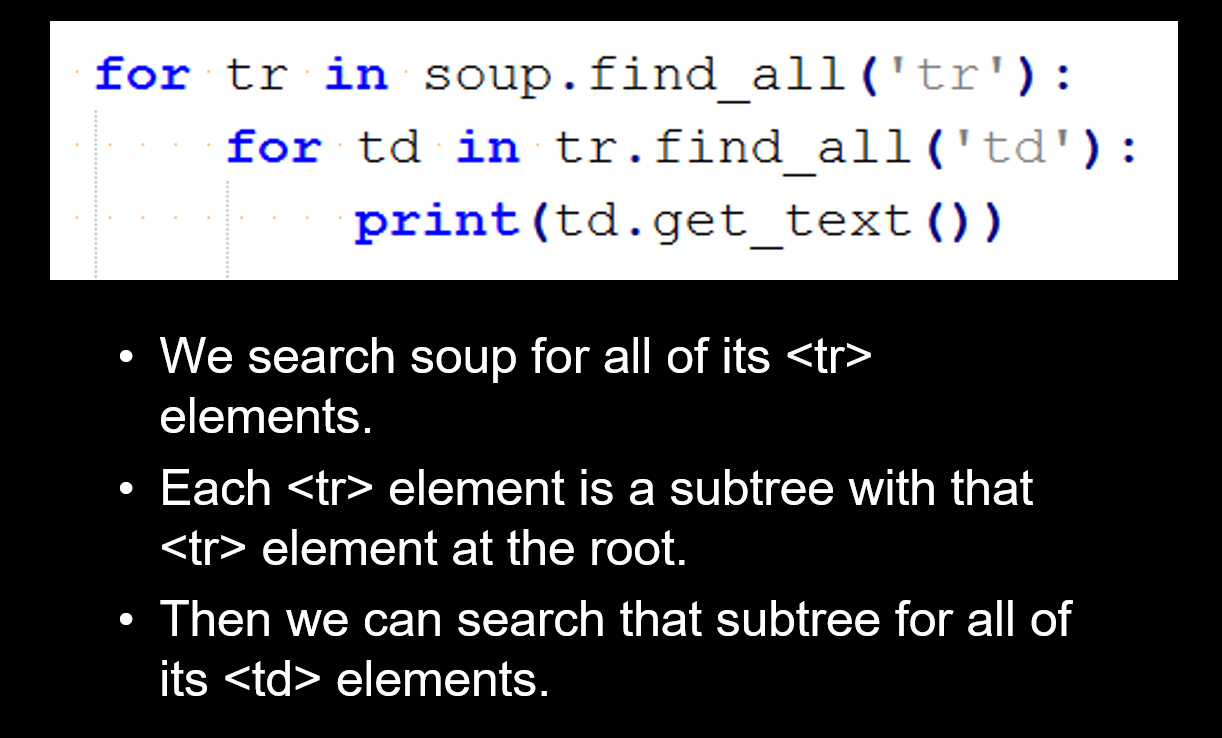

<font color=red>***Recall the format of the city populations websites from last time:***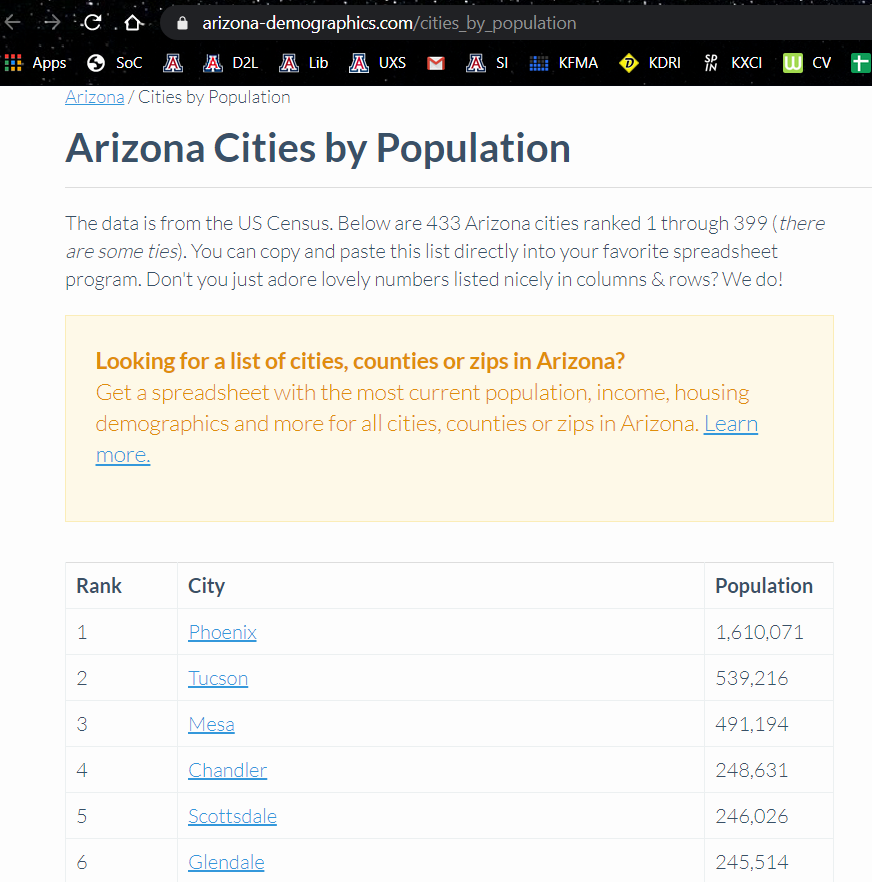

<font color=red>***Let's go ahead and dynamically generate some URL's and create a nice frame comparing some states:***

In [40]:
import requests
from bs4 import BeautifulSoup

In [41]:
def scrape_cities(url, st):
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    rows = soup.find_all('tr')[1:11]
    data = []
    for row in rows:
        tds = row.find_all('td')
        data.append([tds[1].get_text().strip(),
             int(tds[2].get_text().replace(',',''))])
    if st.startswith('new'):
        st = 'New ' + st[3:]
    st = st.title()
    return pd.DataFrame(data, np.arange(1, 11), ['', st])

In [42]:
df = None
for st in ['arizona', 'california', 'newmexico', 'utah', 'colorado']:
    url = 'http://www.' + st + '-demographics.com/cities_by_population'
    if df is None:
        df = scrape_cities(url, st)
    else:
        df = pd.concat([df, scrape_cities(url, st)], 1)

df

,,Arizona,,California,,New Mexico,,Utah,,Colorado
1,Phoenix,1610071,Los Angeles,3959657,Albuquerque,559202,Salt Lake City,195701,Denver,693417
2,Tucson,539216,San Diego,1401932,Las Cruces,101742,West Valley City,135985,Colorado Springs,457502
3,Mesa,491194,San Jose,1026658,Rio Rancho,94765,Provo,116146,Aurora,363550
4,Chandler,248631,San Francisco,870044,Santa Fe,83847,West Jordan,113089,Fort Collins,162511
5,Scottsdale,246026,Fresno,522277,Roswell,48186,Orem,95428,Lakewood,153522
6,Glendale,245514,Sacramento,495011,Farmington,45582,Sandy,95420,Thornton,134588
7,Gilbert,237484,Long Beach,468883,South Valley,41011,Ogden,86126,Arvada,117251
8,Tempe,183652,Oakland,421042,Clovis,39239,St. George,82194,Westminster,112747
9,Peoria,164572,Bakersfield,375699,Hobbs,38052,Layton,75106,Pueblo,109985
10,Surprise,132904,Anaheim,349668,Alamogordo,31230,South Jordan,68491,Centennial,109505


## Planetary data worksheet

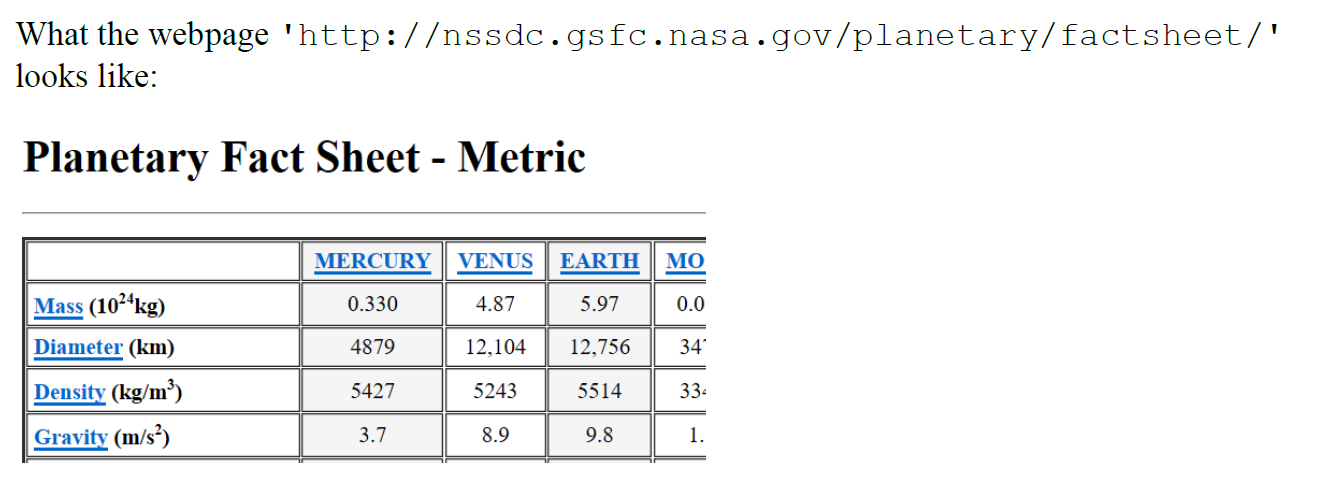

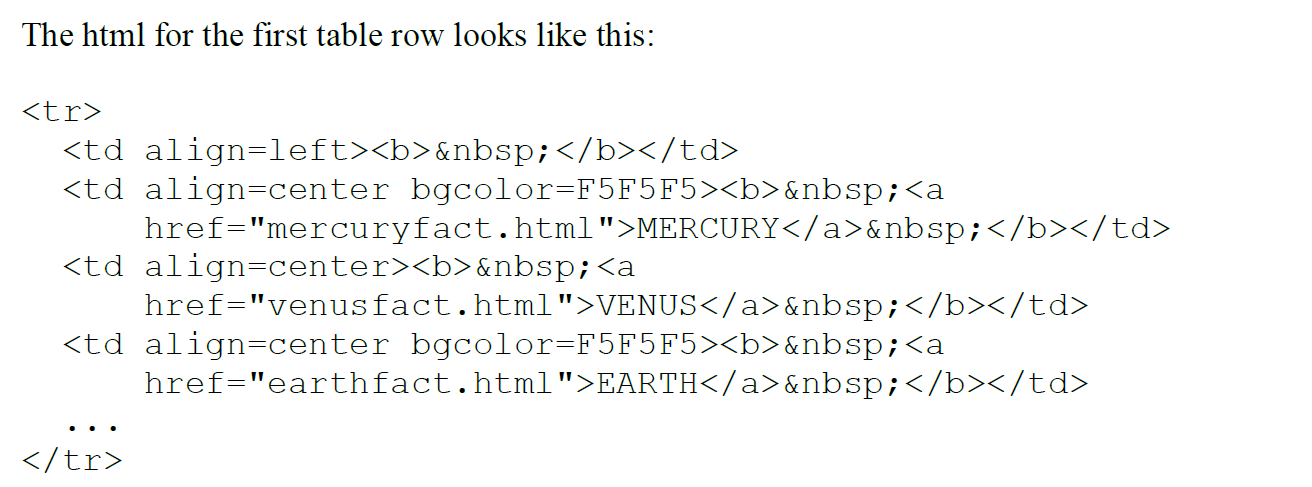

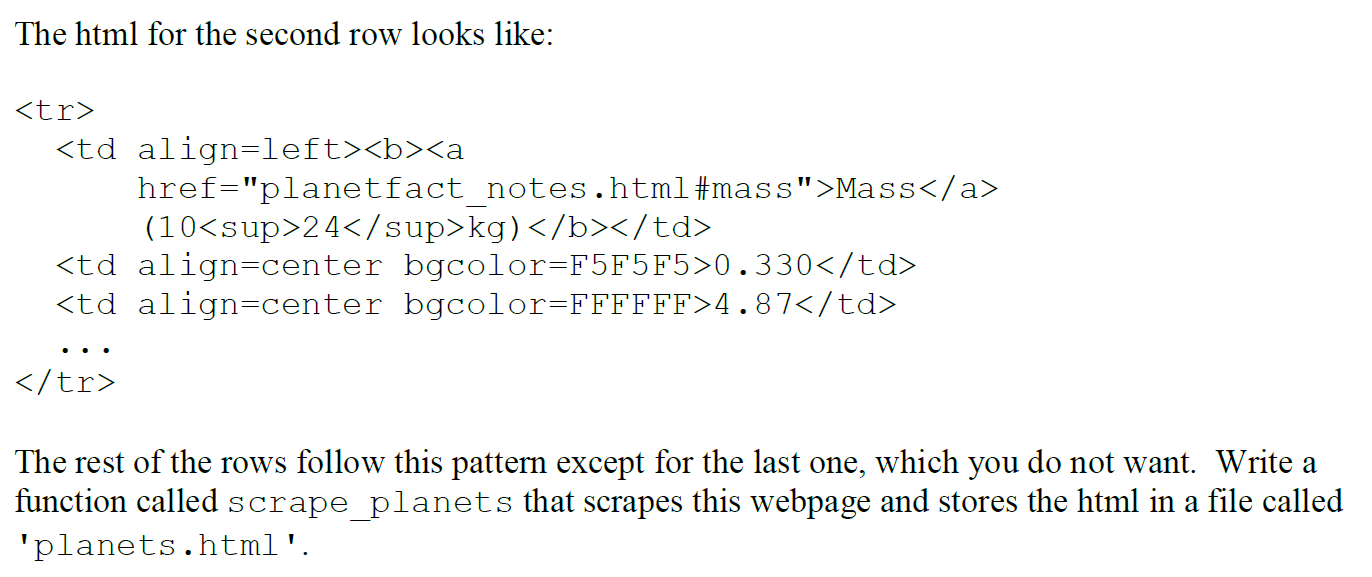

In [47]:
def scrape_planets():
    url = 'http://nssdc.gsfc.nasa.gov/planetary/factsheet/'
    r = requests.get(url)
    with open('planets.html', 'wb') as fp:
        fp.write(r.content)

In [48]:
scrape_planets()

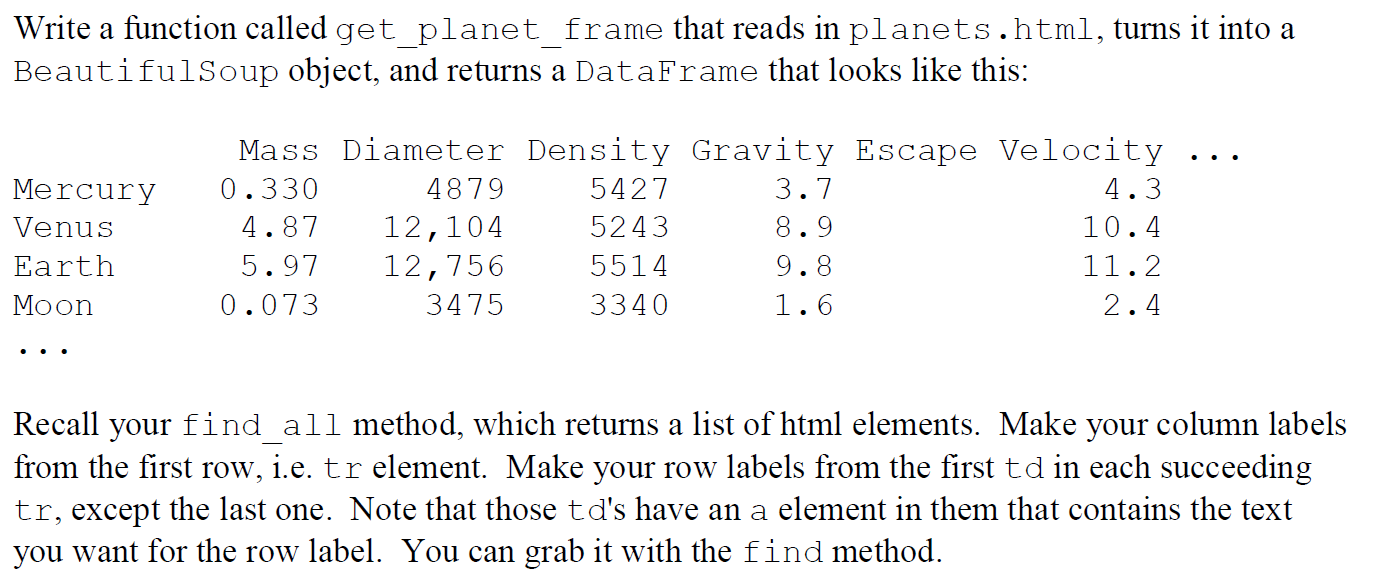

In [50]:
def get_planet_frame():
    ''' for loops, no enumerate '''
    soup = BeautifulSoup(open('planets.html'))
    t = soup.find('table') # unnecessary - only one table
    rows = t.find_all('tr')
    # rows.pop(0) is the header with the planet names but first td is blank
    index = []
    for td in rows.pop(0).find_all('td')[1:]:
        index.append(td.find('a').get_text().capitalize())
    rows.pop() # the last row is also a header - get rid of it
    columns = []
    for tr in rows:
        columns.append(tr.find('td').find('a').get_text())
    data = []
    for i in range(len(index)):
        data.append([])
    for row in rows:
        i = 0
        for td in row.find_all('td')[1:]:
            data[i].append(td.get_text())
            i += 1
    return pd.DataFrame(data, index, columns)

In [51]:
def get_planet_frame2():
    ''' list comprehensions, enumerate '''
    soup = BeautifulSoup(open('planets.html'))
    t = soup.find('table')
    rows = t.find_all('tr')
    # rows.pop(0) is the header with the planet names but first td is blank
    index = [td.find('a').get_text().capitalize() for td in rows.pop(0).find_all('td')[1:]]
    rows.pop() # the last row is also a header - get rid of it
    columns = [tr.find('td').find('a').get_text() for tr in rows]
    data = [[] for i in range(len(index))]
    for row in rows:
        for i, td in enumerate(row.find_all('td')[1:]):
            data[i].append(td.get_text())
    return pd.DataFrame(data, index, columns)

In [52]:
get_planet_frame2()

,Mass,Diameter,Density,Gravity,Escape Velocity,Rotation Period,Length of Day,Distance from Sun,Perihelion,Aphelion,Orbital Period,Orbital Velocity,Orbital Inclination,Orbital Eccentricity,Obliquity to Orbit,Mean Temperature,Surface Pressure,Number of Moons,Ring System?,Global Magnetic Field?
Mercury,0.330,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,69.8,88.0,47.4,7.0,0.205,0.034,167,0,0,No,Yes
Venus,4.87,"12,104",5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,108.9,224.7,35.0,3.4,0.007,177.4,464,92,0,No,No
Earth,5.97,"12,756",5514,9.8,11.2,23.9,24.0,149.6,147.1,152.1,365.2,29.8,0.0,0.017,23.4,15,1,1,No,Yes
Moon,0.073,3475,3340,1.6,2.4,655.7,708.7,0.384*,0.363*,0.406*,27.3*,1.0*,5.1,0.055,6.7,-20,0,0,No,No
Mars,0.642,6792,3933,3.7,5.0,24.6,24.7,227.9,206.6,249.2,687.0,24.1,1.9,0.094,25.2,-65,0.01,2,No,No
Jupiter,1898,"142,984",1326,23.1,59.5,9.9,9.9,778.6,740.5,816.6,4331,13.1,1.3,0.049,3.1,-110,Unknown*,79,Yes,Yes
Saturn,568,"120,536",687,9.0,35.5,10.7,10.7,1433.5,1352.6,1514.5,"10,747",9.7,2.5,0.057,26.7,-140,Unknown*,82,Yes,Yes
Uranus,86.8,"51,118",1271,8.7,21.3,-17.2,17.2,2872.5,2741.3,3003.6,"30,589",6.8,0.8,0.046,97.8,-195,Unknown*,27,Yes,Yes
Neptune,102,"49,528",1638,11.0,23.5,16.1,16.1,4495.1,4444.5,4545.7,"59,800",5.4,1.8,0.011,28.3,-200,Unknown*,14,Yes,Yes
Pluto,0.0146,2370,2095,0.7,1.3,-153.3,153.3,5906.4,4436.8,7375.9,"90,560",4.7,17.2,0.244,122.5,-225,0.00001,5,No,Unknown
